In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Anomaly detection with Local Outlier Factor (LOF) 

As we have very few anomaly telemetries in the dataset, it may make sense to evaluate outlier in the gven population. 

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. See https://scikit-learn.org/0.19/auto_examples/neighbors/plot_lof.html

## Importing dataset - the generated simulator data

In [13]:
data = pd.read_csv('./data/telemetries.csv', delimiter=",")
data.head()

,container_id,measurement_time,product_id,temperature,target_temperature,ambiant_temperature,kilowatts,time_door_open,content_type,defrost_cycle,oxygen_level,nitrogen_level,humidity_level,carbon_dioxide_level,vent_1,vent_2,vent_3,maintenance_required
0,C01,2019-10-21 21:58:47.778469,P02,6.421550,6,20.875069,5.104784,-0.849733,2,6,22.582955,78.414413,59.751720,2.297364,True,True,True,0
1,C01,2019-10-21 22:03:47.778469,P02,5.856868,6,21.128387,5.122725,0.617787,2,5,21.501824,78.449830,61.570283,3.782031,True,True,True,0
2,C01,2019-10-21 22:08:47.778469,P02,5.656720,6,21.171572,2.829637,2.119314,2,6,20.104576,77.771802,61.443443,5.868899,True,True,True,0
3,C01,2019-10-21 22:13:47.778469,P02,6.053072,6,20.665113,1.987387,1.103350,2,4,19.039297,75.704534,60.300971,4.518827,True,True,True,0
4,C01,2019-10-21 22:18:47.778469,P02,6.409696,6,21.025121,2.898705,0.861419,2,5,21.075411,78.685539,59.725525,4.676924,True,True,True,0


In [14]:
# Convert dataset into array for the independent variables (features)
X = np.asarray(data[['oxygen_level','carbon_dioxide_level']])
X[0:5]

array([[22.58295532,  2.29736381],
       [21.50182357,  3.78203147],
       [20.10457641,  5.86889923],
       [19.03929675,  4.51882709],
       [21.07541133,  4.67692364]])

In [17]:
# Normalize/standardize (mean = 0 and standard deviation = 1) 
# your features before applying machine learning techniques.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.16463912, -1.37615722],
       [ 0.41603848, -0.23052444],
       [-0.55144779,  1.37979157],
       [-1.28907208,  0.33801842],
       [ 0.12078078,  0.46001245]])

In [20]:
# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
# Label is 1 for an inlier and -1 for an outlier according to the LOF score and the contamination parameter.
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]
print(y_pred_outliers)

[ 1  1  1 ...  1  1 -1]


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


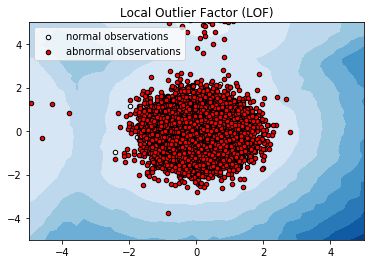

In [19]:
# plot the level sets of the decision function
# Build coordinate matrices
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:500, 0], X[:500, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[500:, 0], X[500:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()